In [27]:
# Task 1 (a)
import pandas as pd

# Load training set
train_data = pd.read_csv(r"C:\Users\Dhyan\Downloads\wdbc_training.csv")

# Extract 30 features
train_features = train_data.iloc[:, 2:32]
# Extract label column from training set
train_label = train_data.iloc[:, 1]

# Load testing set
test_data = pd.read_csv(r"C:\Users\Dhyan\Downloads\wdbc_test.csv")

# Extract 30 features
test_features = test_data.iloc[:, 2:32]
# Extract label column from testing set
test_labels = test_data.iloc[:, 1]

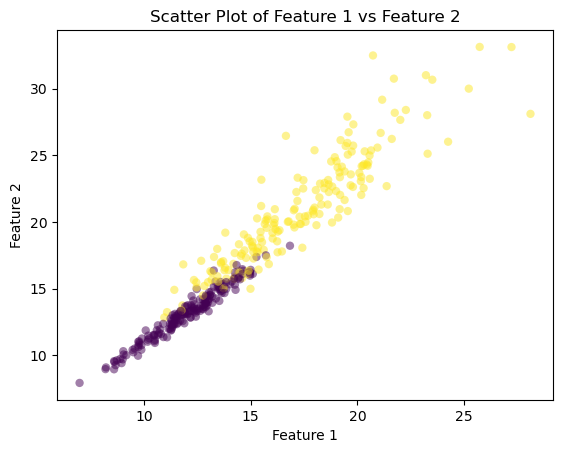

In [28]:
# Task 1 (b)
import matplotlib.pyplot as plt

# Choose two features for scatter plot
feature1 = 'Column3' # Column3 (Mean Radius)
feature2 = 'Column23' # Column23 (Worst Radius)

# Plot scatter plot
plt.scatter(train_features[feature1], train_features[feature2], c=train_label, edgecolor='none', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs Feature 2')

# Save the image
plt.savefig('scatter_plot.png')

# Show the plot
plt.show()

In [29]:
# Task 1 (c)
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training set
scaler.fit(train_features)

# Transform both training and test sets
train_features_normalized = scaler.transform(train_features)
test_features_normalized = scaler.transform(test_features)


In [30]:
# Mean and standard deviation for the first feature in the normalized test set
mean_first_feature = test_features_normalized[:, 0].mean()
std_first_feature = test_features_normalized[:, 0].std()

print("Mean:", mean_first_feature)
print("Standard Deviation:", std_first_feature)

Mean: -0.3814457765983103
Standard Deviation: 0.8381524806309703


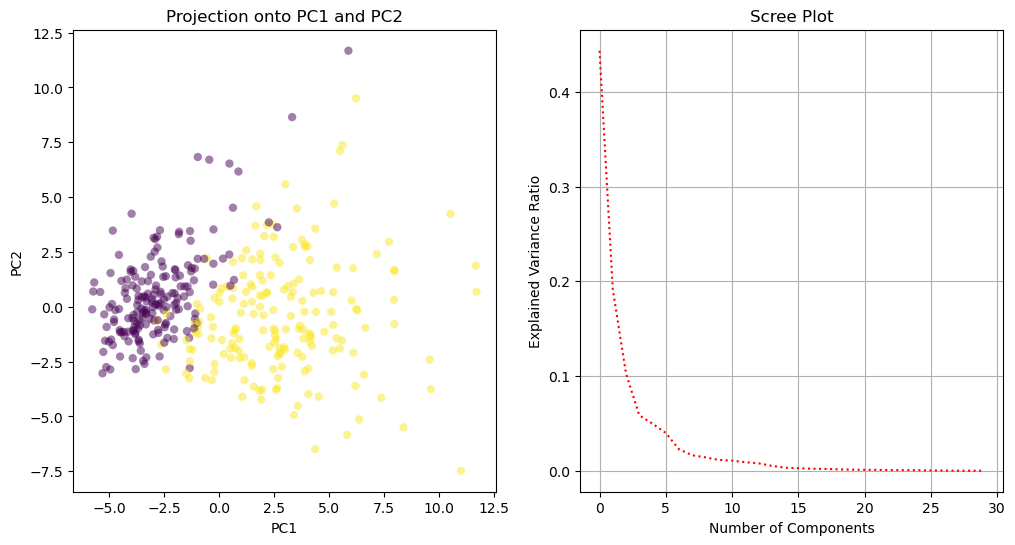

In [31]:
#Task 1 (d)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

# Fit on the scaled training set
eigen_decom = pca.fit(train_features_normalized)

# Project the training set onto the first two principal components
projected = eigen_decom.transform(train_features_normalized)

# Plotting the projection onto PC1 and PC2
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(projected[:, 0], projected[:, 1], c=train_label,  edgecolor='none', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto PC1 and PC2')
classes=['C1', 'C2']

# Plotting the scree plot
plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_, color='red', linestyle='dotted')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Save the image
plt.savefig('pca_plot.png')

# Show the plot
plt.show()


In [32]:
# Task 2 (a)
from sklearn.model_selection import train_test_split

# Divide the training dataset into training set and validation set
train_features_small, val_features, train_label_small, val_label = train_test_split(train_features_normalized, train_label, 
                                                                                    test_size=0.25, random_state=42)


In [33]:
# Task 2 (b)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_features_small)

# Normalise the smaller training set
scaled_trnX = scaler.transform(train_features_small)  
# Normalise the validation set"""
scaled_valX = scaler.transform(val_features)

In [34]:
print(scaled_trnX.mean(axis=0)) # print the mean value of each feature after removing the mean
print(scaled_trnX.std(axis=0)) # print the standard deviation value of each feature after removing the mean

[-2.40548322e-17 -1.17190208e-17  2.94003505e-17 -6.17818554e-17
  4.93432455e-18 -8.22387426e-19 -4.52313084e-18 -2.54940102e-17
  8.63506797e-18  1.23358114e-17  0.00000000e+00  7.98615289e-17
 -1.80925234e-17 -1.64477485e-18 -1.00742460e-17  5.67447324e-17
 -4.19417587e-17 -4.02969839e-17 -7.03141249e-17 -1.23358114e-18
  7.23700935e-17 -1.82981202e-17 -5.75671198e-18 -2.38492353e-17
 -3.70074342e-17  7.40148683e-18 -6.57909941e-18  0.00000000e+00
 -1.49805118e-17 -2.79611725e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [35]:
print(scaled_valX.mean(axis=0)) # print the mean value of each feature after removing the mean
print(scaled_valX.std(axis=0)) # print the standard deviation value of each feature after removing the mean

[-0.20928889 -0.0559348  -0.20025766 -0.20782171  0.06123092  0.06351712
 -0.02823244 -0.04265149 -0.07923401  0.23575945 -0.13004782 -0.06806766
 -0.13021356 -0.14667405  0.04944825  0.07909982  0.08678199  0.12094056
 -0.19922246  0.24235234 -0.14653395 -0.00833473 -0.14296686 -0.14788205
  0.19195595  0.10263398  0.03914784  0.06326011 -0.03964222  0.22075268]
[0.91343191 1.0425207  0.90902193 0.87740418 0.82743665 1.00811104
 0.95333813 0.87437654 0.92346841 1.05933361 0.8139189  1.04689685
 0.86629671 0.71348333 0.92391336 1.11015107 1.50554547 1.21709294
 0.72523861 1.7305001  0.96255536 1.06263941 0.97364925 0.9323044
 1.06860585 1.13210518 1.01137352 0.94693919 0.88469445 1.13899015]


In [36]:
# Task 3 (a)
# Model 1
from sklearn.svm import SVC

svc1 = SVC(kernel='linear', class_weight='balanced', C=3)
model1 = svc1.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit1 = model1.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit1))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit1))

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        44

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



In [37]:
# Task 3 (a)
# Model 2
from sklearn.svm import SVC

svc2 = SVC(kernel='linear', class_weight='balanced', C=20)
model2 = svc2.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit2 = model2.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit2))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit2))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           2       1.00      0.93      0.97        46
           4       0.94      1.00      0.97        44

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [38]:
# Task 3 (a)
# Model 3
from sklearn.svm import SVC

svc3 = SVC(kernel='linear', class_weight='balanced', C=50)
model3 = svc3.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit3 = model3.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit3))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit3))

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           2       0.98      0.93      0.96        46
           4       0.93      0.98      0.96        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [39]:
# Task 3 (a)
# Model 4
from sklearn.svm import SVC

svc4 = SVC(kernel='rbf', class_weight='balanced', C=3, gamma=0.01)
model4 = svc4.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit4 = model4.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit4))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit4))

Accuracy: 0.9888888888888889
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        46
           4       0.98      1.00      0.99        44

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [40]:
# Task 3 (a)
# Model 5
from sklearn.svm import SVC

svc5 = SVC(kernel='rbf', class_weight='balanced', C=20, gamma=1.0)
model5 = svc5.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit5 = model5.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit5))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit5))

Accuracy: 0.7
              precision    recall  f1-score   support

           2       1.00      0.41      0.58        46
           4       0.62      1.00      0.77        44

    accuracy                           0.70        90
   macro avg       0.81      0.71      0.67        90
weighted avg       0.81      0.70      0.67        90



In [41]:
# Task 3 (a)
# Model 6
from sklearn.svm import SVC

svc6 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)
model6 = svc6.fit(scaled_trnX, train_label_small)

# The fitted model should be validated on the scaled validation set.
vyfit6 = model6.predict(scaled_valX)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(val_label, vyfit6))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(val_label, vyfit6))

Accuracy: 0.4888888888888889
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        46
           4       0.49      1.00      0.66        44

    accuracy                           0.49        90
   macro avg       0.24      0.50      0.33        90
weighted avg       0.24      0.49      0.32        90



C:\Users\Dhyan\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhyan\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhyan\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Task 3 (c)

# Assigning Suitable parameter values for C and gamma.
suitable_gamma = 0.01
suitable_C = 3

# Train SVM model with selected kernel and parameter values on the normalized whole training set
selected_model = SVC(kernel='rbf', class_weight='balanced', C=suitable_C, gamma=suitable_gamma)
selected_model.fit(train_features_normalized, train_label)

# Predict labels for the test set
test_predictions = selected_model.predict(test_features_normalized)

# Accuracy measurements
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(test_labels, test_predictions))

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report 
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

Accuracy: 0.9665071770334929
Confusion Matrix:
[[170   7]
 [  0  32]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      0.96      0.98       177
           4       0.82      1.00      0.90        32

    accuracy                           0.97       209
   macro avg       0.91      0.98      0.94       209
weighted avg       0.97      0.97      0.97       209



In [43]:
# Task 4 (b) 

from sklearn.decomposition import PCA

# Initialize PCA with the selected number of principal components
pca = PCA(n_components=4)

# Fit PCA on the normalized training set
pca.fit(train_features_normalized)

# Reduce features for the normalized training set
train_features_pca = pca.transform(train_features_normalized)

# Reduce features for the normalized test set by projecting onto the same PCA space
test_features_pca = pca.transform(test_features_normalized)

In [44]:
# Task 4 (c)

# Normalise the training set and the test set after the feature reduction.
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training set
scaler.fit(train_features_pca)

# Transform both training and test sets
train_features_pca_normalized = scaler.transform(train_features_pca)
test_features_pca_normalized = scaler.transform(test_features_pca)

In [45]:
# Task 4 (c) 
# Train and Test the model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

svm_model = SVC(kernel='rbf', class_weight='balanced', C=3, gamma=0.01)
svm_model.fit(train_features_pca_normalized, train_label)

# Test the model on the corresponding test set
test_predictions_1 = svm_model.predict(test_features_pca_normalized)

# Calculate accuracy rate
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(test_labels, test_predictions_1))

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, test_predictions_1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9808612440191388
Confusion Matrix:
[[173   4]
 [  0  32]]
